# План проекта "Телекоммуникация"

**Описание проекта:** оператор связи хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия.

**Цель проекта:** построить модель для прогнозирования оттока клиентов.  
Ключевая метрика модели (ROC-AUC) должна достичь показателя 0,85.


In [ ]:
import pandas as pd

In [ ]:
df_contract = pd.read_csv('/datasets/contract_new.csv')
df_personal = pd.read_csv('/datasets/personal_new.csv')
df_internet = pd.read_csv('/datasets/internet_new.csv')
df_phone = pd.read_csv('/datasets/phone_new.csv')

In [ ]:
display(df_contract.head())
print()
df_contract.info()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [ ]:
display(df_personal.head())
print()
df_personal.info()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
display(df_internet.head())
print()
df_internet.info()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [ ]:
display(df_phone.head())
print()
df_phone.info()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Наблюдаем, что в нашем распоряжении четыре датасета, которые в дальнейшем будет необходимо объединить. Два датасета содержат 7043 строки, в третье 5517 строк, в четвертом 6361. Можно отметить, что для некоторых столбцов необходимо изменить тип данных, названия признаков привести к нижнему регистру.

# **Структура проекта:**

    1 Подготовка и предобработка данных
        1.1.Импорт библиотек
        1.2 Приведение столбцов к нижнему регистру
        1.3 Изменение типа данных
        1.4 Проверка на наличие явных дубликатов
        1.5 Генерация целевого признака
        1.6 Генерация прочих признаков и удаление лишних признаков
        1.7 Объединение таблиц
        1.8 Заполнение пропусков
        1.9 Промежуточные выводы
        
    2 Исследовательский анализ данных и подготовка к обучению
        2.1 Исследование распределения признаков для ушедших и оставшихся клиентов
        2.2 Матрицы корреляций
        2.3 Разделение данных на выборки
        2.4 Кодирование категориальных признаков
        2.5 Промежуточные выводы
        
    3 Обучение моделей
        3.1 Логистическая регрессия
        3.2 Случайный лес
        3.3 Бустинговая модель
        3.4 Анализ полученных результатов
        3.5 Проверка выбранной модели на тестовой выборке
       
        
    4 Выводы / Отчет

## Подготовка и предобработка данных

### Импорт библиотек

In [ ]:
!pip install pandasql
!pip install phik
!pip install catboost

In [ ]:
# Импорт библиотек

import pandas as pd
import numpy as np

# Графики
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

# CatBoost
from catboost import CatBoostClassifier, Pool, cv

# phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

import time
import pandasql as ps

import warnings
warnings.filterwarnings('ignore')


In [ ]:
RANDOM_STATE = 30723
PROMO = 0.3

### Приведение столбцов к нижнему регистру

In [ ]:
# Приведем столбцы в нижний регистр
df_contract.columns = df_contract.columns.str.lower()
df_personal.columns = df_personal.columns.str.lower()
df_internet.columns = df_internet.columns.str.lower()
df_phone.columns = df_phone.columns.str.lower()

# Приведем названия признаков в питоновский стиль
df_contract.rename(columns={
    'customerid': 'customer_id',
    'begindate': 'begin_date',
    'enddate': 'end_date',
    'paperlessbilling': 'paperless_billing',
    'paymentmethod': 'payment_method',
    'monthlycharges': 'monthly_charges',
    'totalcharges': 'total_charges'
}, inplace=True)

df_personal.rename(columns={
    'customerid': 'customer_id',
    'gender': 'gender',
    'seniorcitizen': 'senior_citizen',
    'partner': 'partner',
    'dependents': 'dependents'
}, inplace=True)

df_internet.rename(columns={
    'customerid': 'customer_id',
    'internetservice': 'internet_service',
    'onlinesecurity': 'online_security',
    'onlinebackup': 'online_backup',
    'deviceprotection': 'device_protection',
    'techsupport': 'tech_support',
    'streamingtv': 'streaming_tv',
    'streamingmovies': 'streaming_movies'
}, inplace=True)

df_phone.rename(columns={
    'customerid': 'customer_id',
    'multiplelines': 'multiple_lines'
}, inplace=True)


# Проверим названия столбцов
print(df_contract.columns)
print(df_personal.columns)
print(df_internet.columns)
print(df_phone.columns)

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')
Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')
Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')
Index(['customer_id', 'multiple_lines'], dtype='object')


### Изменение типа данных

In [ ]:
df_contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [ ]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


В df_contract необходимо изменить тип данных в следующих столбцах: begindate, enddate, totalcharges

In [ ]:
df_contract['begin_date'] = pd.to_datetime(df_contract['begin_date'])
# Заменим все No на актуальную дату:  2020-02-01
df_contract['end_date'] = df_contract['end_date'].replace('No', '2020-02-01')
df_contract['end_date'] = pd.to_datetime(df_contract['end_date'])

Замечаем, что присутствуют пустые занчения в столбце totalcharges, если begindate = 2020-02-01, т.е. клиент только начал пользоватьс услугами компании. Поэтому заменим пустые значения нулями.

In [ ]:
df_contract['total_charges'] = df_contract['total_charges'].replace(' ', 0)
df_contract['total_charges'] = df_contract['total_charges'].astype(float)

In [ ]:
# Проврим остпались ли пустые значения в totalcharges
df_contract.loc[df_contract['total_charges']== ' ']

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges


In [ ]:
df_contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50


In [ ]:
# Проверим типы данных датафрейма df_contract
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


В остальных датафреймах типы данных соотвутствуют содержимому

### Проверка на наличие явных дубликатов

In [ ]:
# Проверка df_contract на наличие явных дубликатов
print("Количество явных дубликатов в df_contract:", df_contract.duplicated().sum())

# Проверка df_personal на наличие явных дубликатов
print("Количество явных дубликатов в df_personal:", df_personal.duplicated().sum())

# Проверка df_internet на наличие явных дубликатов
print("Количество явных дубликатов в df_internet:", df_internet.duplicated().sum())

# Проверка df_phone на наличие явных дубликатов
print("Количество явных дубликатов в df_phone:", df_phone.duplicated().sum())


Количество явных дубликатов в df_contract: 0
Количество явных дубликатов в df_personal: 0
Количество явных дубликатов в df_internet: 0
Количество явных дубликатов в df_phone: 0


Явные дубликаты отсутствуют

### Генерация целевого признака

Сгенерируем целевой признак из значений столбца enddate датафрейма df_contract

In [ ]:
df_contract.head(3)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17


In [ ]:
df_contract['gone'] = np.where(df_contract['end_date'] == '2020-02-01', 0, 1)

In [ ]:
df_contract.head(10)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gone
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0
5,9305-CDSKC,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,99.65,1150.96,0
6,1452-KIOVK,2018-04-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,0
7,6713-OKOMC,2019-04-01,2020-02-01,Month-to-month,No,Mailed check,29.75,300.48,0
8,7892-POOKP,2017-07-01,2020-02-01,Month-to-month,Yes,Electronic check,104.80,3573.68,0
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,1


Целевой признак создан и принимает значение 1, если клиент перестал пользоваться услугами компании.

### Генерация прочих признаков и удаление лишних признаков

Так как наличие таких признаков как begindate и enddate создаёт утечку, то необходимо их удалить. Но, чтобы не терять данные сначала сгенерируем признак продолжительности пользования услугами.

In [ ]:
df_contract['duration'] = (df_contract['end_date'] - df_contract['begin_date']).dt.days.astype(int)
df_contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gone,duration
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153


Удалим призннаки begindate и enddate

In [ ]:
df_contract = df_contract.drop(['begin_date', 'end_date'], axis=1)

In [ ]:
# Проверим датафрейм после удаления признаков
df_contract.head(10)

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,gone,duration
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153
5,9305-CDSKC,Month-to-month,Yes,Electronic check,99.65,1150.96,0,337
6,1452-KIOVK,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,0,671
7,6713-OKOMC,Month-to-month,No,Mailed check,29.75,300.48,0,306
8,7892-POOKP,Month-to-month,Yes,Electronic check,104.80,3573.68,0,945
9,6388-TABGU,One year,No,Bank transfer (automatic),56.15,1628.35,1,882


### Объединение таблиц

In [ ]:
# Создание SQL-запроса объединения
query = '''
    SELECT c.customer_id,
            c.type,
            c.paperless_billing,
            c.payment_method,
            c.monthly_charges,
            c.total_charges,
            c.gone,
            c.duration,
            p.gender,
            p.senior_citizen,
            p.partner,
            p.dependents,
            i.internet_service,
            i.online_security,
            i.online_backup,
            i.device_protection,
            i.tech_support,
            i.streaming_tv,
            i.streaming_movies,
            ph.multiple_lines

    FROM df_contract AS c
    LEFT JOIN df_personal AS p ON c.customer_id = p.customer_id
    LEFT JOIN df_internet AS i ON c.customer_id = i.customer_id
    LEFT JOIN df_phone AS ph ON c.customer_id = ph.customer_id
'''

# Выполнение SQL-запроса
full_df = ps.sqldf(query, locals())



In [ ]:
full_df.head()

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,gone,duration,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,None
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,None
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   float64
 6   gone               7043 non-null   int64  
 7   duration           7043 non-null   int64  
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   5517 non-null   object 
 13  online_security    5517 non-null   object 
 14  online_backup      5517 non-null   object 
 15  device_protection  5517 non-null   object 
 16  tech_support       5517 

После объединения получили таблицу состоящую из 20 столбцов. Наблюдаем пропуски в признаках из присоединенных таблиц.

### Заполнение пропусков

In [ ]:
pd.set_option('display.max_columns', None)  # Отобразить все столбцы
full_df.loc[full_df['internet_service'].isna()].head(15)

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,gone,duration,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
11,7469-LKBCI,Two year,No,Credit card (automatic),18.95,312.30,0,488,Male,0,No,No,None,None,None,None,None,None,None,No
16,8191-XWSZG,One year,No,Mailed check,20.65,1106.01,0,1584,Female,0,No,No,None,None,None,None,None,None,None,No
21,1680-VDCWW,One year,No,Bank transfer (automatic),19.80,237.60,0,365,Male,0,Yes,No,None,None,None,None,None,None,None,No
22,1066-JKSGK,Month-to-month,No,Mailed check,20.15,61.05,0,92,Male,0,No,No,None,None,None,None,None,None,None,No
33,7310-EGVHZ,Month-to-month,No,Bank transfer (automatic),20.20,22.22,0,31,Male,0,No,No,None,None,None,None,None,None,None,No
42,9867-JCZSP,One year,No,Mailed check,20.75,352.75,0,518,Female,0,Yes,Yes,None,None,None,None,None,None,None,No
58,3957-SQXML,Two year,No,Credit card (automatic),24.95,890.72,0,1036,Female,0,Yes,Yes,None,None,None,None,None,None,None,Yes
68,3170-NMYVV,Two year,No,Bank transfer (automatic),20.15,1007.50,0,1523,Female,0,Yes,Yes,None,None,None,None,None,None,None,No
71,0731-EBJQB,One year,Yes,Electronic check,20.40,1060.80,0,1584,Female,0,Yes,Yes,None,None,None,None,None,None,None,No
73,8028-PNXHQ,Two year,Yes,Bank transfer (automatic),24.25,1503.50,0,1888,Male,0,Yes,Yes,None,None,None,None,None,None,None,Yes


Так как нам неизвестно, какие конкретно доп. услуги используют пользователи, то заменим пропуски заглушкой no

In [ ]:
full_df = full_df.fillna('No')

In [ ]:
# проверим наличие пропусков
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   float64
 6   gone               7043 non-null   int64  
 7   duration           7043 non-null   int64  
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   7043 non-null   object 
 13  online_security    7043 non-null   object 
 14  online_backup      7043 non-null   object 
 15  device_protection  7043 non-null   object 
 16  tech_support       7043 

### Промежуточные выводы

В данном разделе была проделана предобработка данных: названия столбцов были приведены к нижнему регистру, был изменен тип данных, произведена проверка на наличие явных дубликатов.  
На основании даты прекращения договора клиента был сгенерирован целевой признак. Также, был создан признак продолжительности пользования услугами компании и удалены даты начала и конца сотрудничества, чтобы избежать утечки.  
Все четыре таблицы были объединены. В полученной таблице были заполнены пропуски.

## Исследовательский анализ данных и подготовка к обучению

### Исследование распределения признаков для ушедших и оставшихся клиентов

In [ ]:
df_false = full_df.loc[full_df['gone']==0]
df_true = full_df.loc[full_df['gone']==1]

In [ ]:
full_df.columns

Index(['customer_id', 'type', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'gone', 'duration', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines'],
      dtype='object')

Построим графики распределения продолжительности сотрудничества для ушедших и оставшихся клиентов

In [ ]:
def hist_dur(data, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='duration')
    plt.xlabel('Продолжительность')
    plt.ylabel('Кол-во')
    plt.title(title)
    plt.show()
    print(data['duration'].describe())

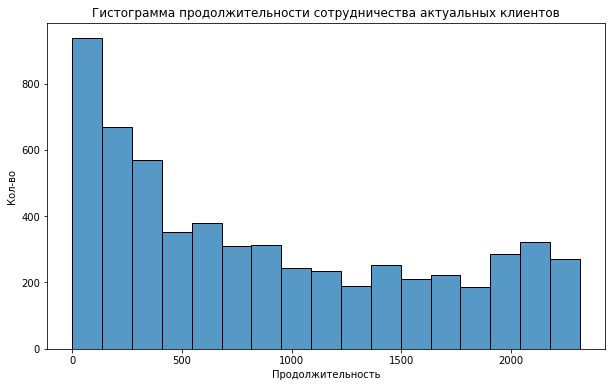

count    5942.000000
mean      893.681084
std       716.958551
min         0.000000
25%       245.000000
50%       702.000000
75%      1523.000000
max      2314.000000
Name: duration, dtype: float64


In [ ]:
hist_dur(df_false, 'Гистограмма продолжительности сотрудничества актуальных клиентов')

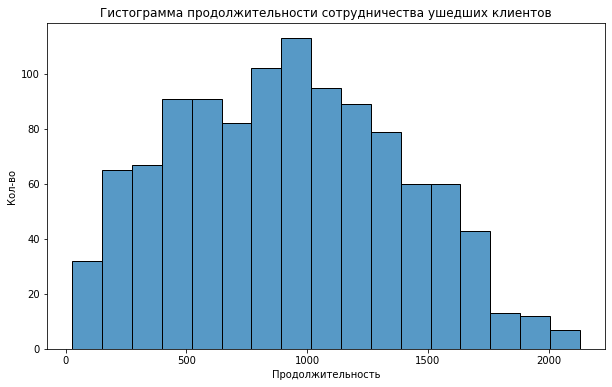

count    1101.000000
mean      924.863760
std       458.771309
min        28.000000
25%       577.000000
50%       915.000000
75%      1249.000000
max      2129.000000
Name: duration, dtype: float64


In [ ]:
hist_dur(df_true, 'Гистограмма продолжительности сотрудничества ушедших клиентов')

Наблюдаем, что кол-во актуальных клиентов составляет 5942, кол-во ушедших - 1101.  
Медиана продолжительности сотрудничества актуальных клиентов 702 дня, средняя величина 893 дня. Аналогичные показатели для ушедших клиентов - 915 и 924 дня соответствуенно.  

На основании графиков и представленных данных можно сделать предварительный вывод, что  клиенты, продолжительность оказания услуг которым составляет около 900 дней находятся в зоне риска ухода.

Также обращаем внимание на то, что на графике актуальных клиентов, после плато на интервале 1000-2000 дней, происходит рост кол-ва пользователей. На графике ушедших пользователей после 2000 также наблюдаем резкий спад показателя. Можно сделать вывод, что после 2000 дней пользователи достигают большого показателя лояльности и не меняют оператора связи.

In [ ]:
full_df.columns

Index(['customer_id', 'type', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'gone', 'duration', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines'],
      dtype='object')

In [ ]:
def hist_(data, x, hue, xlabel, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, x=x, hue=hue, multiple="stack")
    plt.xlabel(xlabel)
    plt.ylabel('Кол-во')
    plt.title(title)
    plt.show()

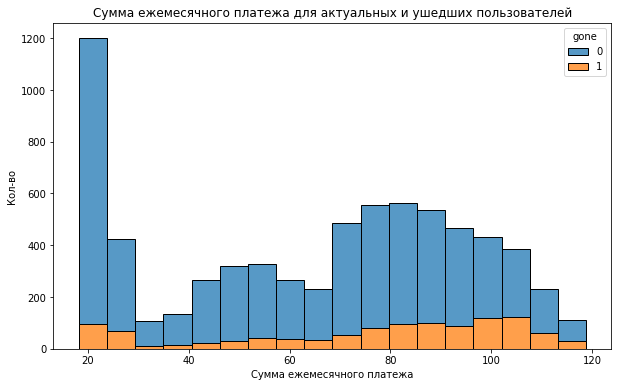

In [ ]:
hist_(full_df, 'monthly_charges', 'gone', 'Сумма ежемесячного платежа',
      'Сумма ежемесячного платежа для актуальных и ушедших пользователей')

Опираясь на график распределения ежемесячных платежей наблюдаем, что, условно, всех пользователей можно разделить на три группы: 0-29, 30-69, 70-120.

Можно заметить, что вторая группа обладает наименьшей численностью. бОльшая часть ушедших клиентов относились к третьей группе с самыми высокими расходами. Графики ушедших и актуальных пользователей практически симметричны, но существенное различие составляет высокое кол-во актуальных пользователей с низким ежемесячным платежом.

### Матрицы корреляций

Построим таблицу и хитмэп со значениями коэффициента Фи корреляции.

In [ ]:
# Построим таблицу со значениями коэффициента Фи корреляции.

interval_cols = ['monthly_charges', 'total_charges', 'duration']
phik_overview = full_df.drop(['customer_id', 'type', 'paperless_billing', 'payment_method', 'gender', 'partner',
                             'dependents', 'internet_service', 'online_security', 'online_backup',
                             'device_protection', 'tech_support', 'streaming_tv', 'streaming_tv', 'streaming_movies',
                             'multiple_lines'], axis=1).phik_matrix(interval_cols=interval_cols)
phik_overview.round(2)

,monthly_charges,total_charges,gone,duration,senior_citizen
monthly_charges,1.00,0.71,0.23,0.39,0.30
total_charges,0.71,1.00,0.30,0.85,0.14
gone,0.23,0.30,1.00,0.37,0.09
duration,0.39,0.85,0.37,1.00,0.06
senior_citizen,0.30,0.14,0.09,0.06,1.00


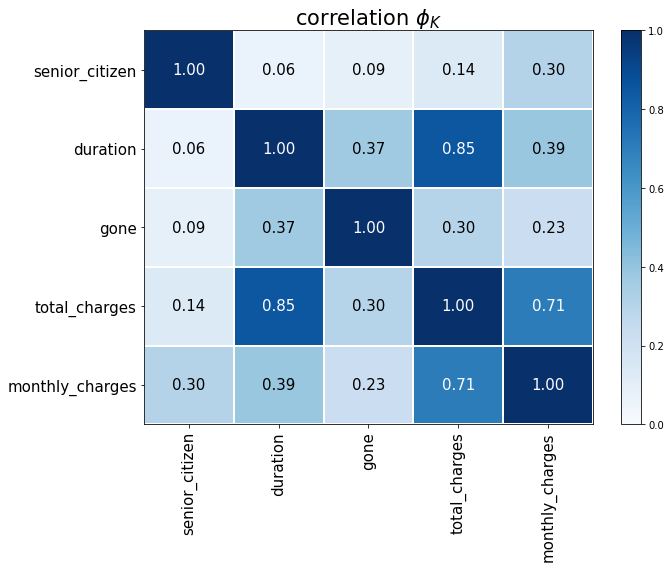

In [ ]:
# Построим хитмэп со значениями коэффициента Фи корреляции.
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Blues",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=1.5,
                        figsize=(10, 8))
plt.tight_layout()

Наблюдаем сильную зависимость между продолжительностью и суммарными выплатами, с фи коэффициентом в 0.85.  
Также присутствует зависимость между суммарными выплатами и месячным платежом, фи коэффициент равен 0,71.  

Так как планируется обучение логистической регрессии, то необходимо избавиться от мультиколлинеарности, поэтому принимаем решение удалить признак "totalcharges".

In [ ]:
full_df = full_df.drop(['total_charges', 'customer_id'], axis=1)

### Разделение данных на выборки

In [ ]:
target = full_df['gone']
features = full_df.drop('gone', axis = 1)

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE)

In [ ]:
# Проверим размеры полученных выборок:
print(f' Размер features_train: {features_train.shape}')
print(f' Размер target_train: {target_train.shape}')
print()
print(f' Размер features_test: {features_test.shape}')
print(f' Размер target_test: {target_test.shape}')

 Размер features_train: (5282, 17)
 Размер target_train: (5282,)

 Размер features_test: (1761, 17)
 Размер target_test: (1761,)


### Кодирование категориальных признаков

In [ ]:
features_train.head(1)

,type,paperless_billing,payment_method,monthly_charges,duration,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
1373,Month-to-month,No,Mailed check,19.85,31,Male,0,No,Yes,No,No,No,No,No,No,No,No


In [ ]:
# Кодируем признаки для логистической  регрессии и случайного леса.

features_categirical = ['type', 'paperless_billing', 'payment_method', 'gender', 'partner', 'dependents',
                        'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support',
                        'streaming_tv', 'streaming_movies', 'multiple_lines']

# кодируем выборки
ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit(features_train[features_categirical])

def features_ohe(ohe_variable, df_features, features_categ):
    df_features_ohe = pd.DataFrame(
        data=ohe_variable.transform(df_features[features_categ]),
        index=df_features.index,
        columns=ohe_variable.get_feature_names()
    )

    df_features = df_features.drop(features_categ, axis=1)
    df_features = df_features.join(df_features_ohe)
    return df_features

features_train_OHE = features_ohe(ohe, features_train, features_categirical);
features_test_OHE = features_ohe(ohe, features_test, features_categirical);

In [ ]:
# Проверим выборки после кодирования
def shape_(df):
    print(df.shape)
shape_(features_train_OHE)
shape_(features_test_OHE)

(5282, 21)
(1761, 21)


Можно заметить, что кол-во признаков увеличилось до 28.

### Промежуточные выводы

В данном разделе было рассмотрено распределение клиентов по продолжительности сотрудничества в разрезе ушедших и актуальных клиентов. Было отмечено, что согласно графикам, потребители, которые пользуются услугами около 900 дней находятся в зоне риска ухода, в то время как пользователи, продолжительность сотрудничества превысила 2000 дней не склонны к уходу.

Была произведена проверка на мультиколлинеарность, где были отмечены высокий кровень зависимости между продолжительностью и суммарными выплатами, а также суммарными выплатами и месячным платежом. Было принято решение удалить столбец с суммарными выплатами.

Было произведено разделение данных на выборки и выполнено кодирование категориальных признаков.

## Обучение моделей

### Логистическая регрессия

In [ ]:
# масштабируем признаки для логистической регрессии
scaler = StandardScaler()
scaler.fit(features_train_OHE)

features_train_OHE_scaled = pd.DataFrame(
    scaler.transform(features_train_OHE), columns=features_train_OHE.columns, index = features_train_OHE.index)
features_test_OHE_scaled = pd.DataFrame(
    scaler.transform(features_test_OHE), columns=features_test_OHE.columns, index = features_test_OHE.index)

In [ ]:
# Создадим модель и параметры для неё
model_linear = LogisticRegression(solver = 'liblinear', random_state=RANDOM_STATE, class_weight='balanced')

parametrs_linear = {}
grid_linear = RandomizedSearchCV(model_linear, scoring='roc_auc', cv=5, param_distributions = parametrs_linear)

In [ ]:
start_time = time.time()
grid_linear.fit(features_train_OHE_scaled, target_train)
end_time = time.time()
print("Training time: {} seconds".format(end_time - start_time))

Training time: 1.0309793949127197 seconds


In [ ]:
print(f'Средний результат кросс валидации логистической регрессии = {(grid_linear.best_score_)}')

Средний результат кросс валидации логистической регрессии = 0.7637254292492912


### Случайный лес

In [ ]:
# Создадим модель и параметры для неё
model_rf = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1, class_weight='balanced')

parametrs_rf = {"n_estimators": range(100,200),
                "max_depth": range(10,20)}
grid_rf = RandomizedSearchCV(model_rf, n_iter=20, scoring='roc_auc', cv=5,
                                     param_distributions = parametrs_rf, random_state=RANDOM_STATE, verbose=3)

In [ ]:
start_time = time.time()
grid_rf.fit(features_train_OHE, target_train)
end_time = time.time()
print("Training time: {} seconds".format(end_time - start_time))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................max_depth=15, n_estimators=142; total time=   0.5s
[CV 2/5] END .................max_depth=15, n_estimators=142; total time=   0.5s
[CV 3/5] END .................max_depth=15, n_estimators=142; total time=   0.5s
[CV 4/5] END .................max_depth=15, n_estimators=142; total time=   0.5s
[CV 5/5] END .................max_depth=15, n_estimators=142; total time=   0.5s
[CV 1/5] END .................max_depth=10, n_estimators=110; total time=   0.4s
[CV 2/5] END .................max_depth=10, n_estimators=110; total time=   0.4s
[CV 3/5] END .................max_depth=10, n_estimators=110; total time=   0.4s
[CV 4/5] END .................max_depth=10, n_estimators=110; total time=   0.4s
[CV 5/5] END .................max_depth=10, n_estimators=110; total time=   0.4s
[CV 1/5] END .................max_depth=17, n_estimators=120; total time=   0.5s
[CV 2/5] END .................max_depth=17, n_e

In [ ]:
print(f'Средний результат кросс валидации модели случайного леса rougher = {(grid_rf.best_score_)}')

Средний результат кросс валидации модели случайного леса rougher = 0.8159045808094916


### Catboost

In [ ]:
# Создание модели
model_cb = CatBoostClassifier(iterations=200,
                           depth=6,
                           learning_rate=0.1,
                           loss_function='Logloss',
                           eval_metric='AUC',
                           random_seed=RANDOM_STATE)
pool = Pool(features_train, target_train, cat_features=features_categirical)

In [ ]:
start_time = time.time()
cv_results = cv(pool, model_cb.get_params(), fold_count=5, plot=False)
print(cv_results)
end_time = time.time()
print("Training time: {} seconds".format(end_time - start_time))

Training on fold [0/5]
0:	test: 0.7337694	best: 0.7337694 (0)	total: 55.9ms	remaining: 11.1s
1:	test: 0.7434347	best: 0.7434347 (1)	total: 60.5ms	remaining: 5.99s
2:	test: 0.7744551	best: 0.7744551 (2)	total: 67.6ms	remaining: 4.44s
3:	test: 0.7752540	best: 0.7752540 (3)	total: 74.4ms	remaining: 3.65s
4:	test: 0.7882105	best: 0.7882105 (4)	total: 79.9ms	remaining: 3.12s
5:	test: 0.7928673	best: 0.7928673 (5)	total: 86ms	remaining: 2.78s
6:	test: 0.8016586	best: 0.8016586 (6)	total: 92ms	remaining: 2.54s
7:	test: 0.8049566	best: 0.8049566 (7)	total: 98.4ms	remaining: 2.36s
8:	test: 0.8091115	best: 0.8091115 (8)	total: 105ms	remaining: 2.22s
9:	test: 0.8100333	best: 0.8100333 (9)	total: 111ms	remaining: 2.12s
10:	test: 0.8100367	best: 0.8100367 (10)	total: 116ms	remaining: 1.99s
11:	test: 0.8078142	best: 0.8100367 (10)	total: 122ms	remaining: 1.9s
12:	test: 0.8097704	best: 0.8100367 (10)	total: 126ms	remaining: 1.81s
13:	test: 0.8101050	best: 0.8101050 (13)	total: 131ms	remaining: 1.74s


Наблюдаем, что на кросс-валидации логистическая регрессия получила результат 0.76, случайный лес 0.81, а Catboost модель - 0.87.  
Поэтому на тестовой выборке будет использована Catboost модель.

### Проверка выбранной модели на тестовой выборке

In [ ]:
# Обучение модели
model_cb.fit(features_train, target_train, cat_features=features_categirical)

0:	total: 7.86ms	remaining: 1.56s
1:	total: 14.6ms	remaining: 1.45s
2:	total: 21.7ms	remaining: 1.43s
3:	total: 29ms	remaining: 1.42s
4:	total: 36.4ms	remaining: 1.42s
5:	total: 40.5ms	remaining: 1.31s
6:	total: 46.8ms	remaining: 1.29s
7:	total: 52.9ms	remaining: 1.27s
8:	total: 59.7ms	remaining: 1.27s
9:	total: 66ms	remaining: 1.25s
10:	total: 72.2ms	remaining: 1.24s
11:	total: 78.9ms	remaining: 1.24s
12:	total: 82.7ms	remaining: 1.19s
13:	total: 89.2ms	remaining: 1.19s
14:	total: 96.2ms	remaining: 1.19s
15:	total: 103ms	remaining: 1.19s
16:	total: 110ms	remaining: 1.18s
17:	total: 116ms	remaining: 1.17s
18:	total: 122ms	remaining: 1.16s
19:	total: 127ms	remaining: 1.15s
20:	total: 130ms	remaining: 1.11s
21:	total: 137ms	remaining: 1.1s
22:	total: 144ms	remaining: 1.11s
23:	total: 149ms	remaining: 1.09s
24:	total: 155ms	remaining: 1.09s
25:	total: 162ms	remaining: 1.08s
26:	total: 169ms	remaining: 1.08s
27:	total: 175ms	remaining: 1.07s
28:	total: 180ms	remaining: 1.06s
29:	total: 185

In [ ]:
predictions = model_cb.predict(features_test)
probabilities =  model_cb.predict_proba(features_test)
probabilities_one  = probabilities[:, 1]
print(f'roc auc = {roc_auc_score(target_test, probabilities_one)}')

roc auc = 0.8836895782276598


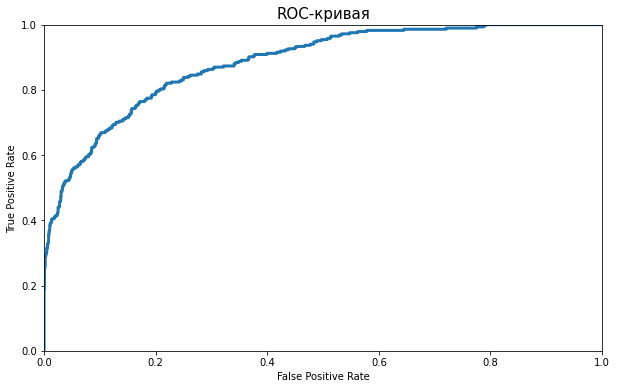

In [ ]:
# Построим ROC кривую
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, linewidth=3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая', size = 15)
plt.show()

In [ ]:
accuracy = accuracy_score(target_test, predictions)
precision = precision_score(target_test, predictions)
recall = recall_score(target_test, predictions)
f1 = f1_score(target_test, predictions)

# Вывод результатов
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Accuracy: 0.89
Precision: 0.81
Recall: 0.41
F1-score: 0.54


Наблюдается, низкий уровень "угадывания" единичного класса 0.54, но точность положительного класса выше 0.81. Далее узнаем, какая модель лучше минимизирует расходы компании.

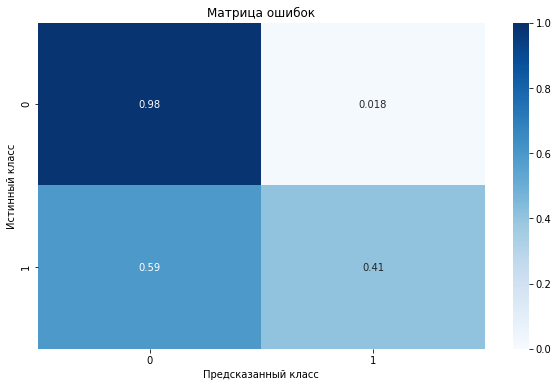

In [ ]:
# Построим матрицу ошибок
conf_matrix = confusion_matrix(target_test, predictions, normalize='true')
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='Blues', vmin=0, vmax=1)
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

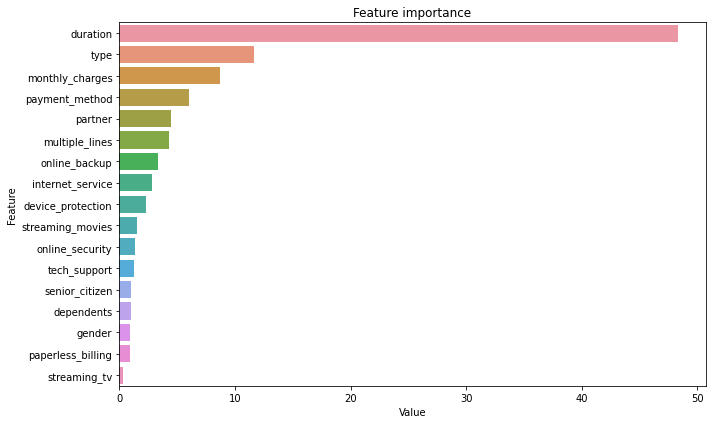

In [ ]:
feature_importance = model_cb.feature_importances_
feature_imp = pd.DataFrame(sorted(zip(feature_importance, features.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Feature importance')
plt.tight_layout()
plt.show();

## Выбор модели для минимизации издержек

In [ ]:
best_linear = grid_linear.best_estimator_
best_rf = grid_rf.best_estimator_

In [ ]:
threshold = 0.35

In [ ]:
predictions = best_linear.predict_proba(features_test_OHE_scaled)[:, 1] >= threshold
predictions = predictions.astype(int)
features_test['best_linear'] = predictions

predictions = best_rf.predict_proba(features_test_OHE)[:, 1] >= threshold
predictions = predictions.astype(int)
features_test['best_rf'] = predictions

predictions = model_cb.predict_proba(features_test)[:, 1] >= threshold
predictions = predictions.astype(int)
features_test['catboost'] = predictions

features_test['target'] = target_test

In [ ]:
final_test = features_test[['monthly_charges', 'best_linear', 'best_rf', 'catboost', 'target']]

### Логистическая регрессия

**Убытки от выданных промокодов лояльным клиентам (ошибка 1-го рода)**

In [ ]:
final_test.loc[(final_test['best_linear']==1) &
               (final_test['best_linear'] != final_test['target'])]['monthly_charges'].sum() * PROMO

17230.394999999997

**Убытки от ухода клиента, которому не выдали промо (ошибка 2-го рода)**

In [ ]:
final_test.loc[(final_test['best_linear']==0) &
               (final_test['best_linear'] != final_test['target'])]['monthly_charges'].sum()

3283.5

### Случайный лес

In [ ]:
final_test.loc[(final_test['best_rf']==1) &
               (final_test['best_rf'] != final_test['target'])]['monthly_charges'].sum() * PROMO

7515.254999999999

In [ ]:
final_test.loc[(final_test['best_rf']==0) &
               (final_test['best_rf'] != final_test['target'])]['monthly_charges'].sum()

5843.450000000002

### Catboost

In [ ]:
final_test.loc[(final_test['catboost']==1) &
               (final_test['catboost'] != final_test['target'])]['monthly_charges'].sum() * PROMO

1976.8500000000001

In [ ]:
final_test.loc[(final_test['catboost']==0) &
               (final_test['catboost'] != final_test['target'])]['monthly_charges'].sum()

8591.25

In [ ]:
final_test.loc[(final_test['catboost']==1) &
               (final_test['catboost'] != final_test['target'])]['monthly_charges'].sum() * PROMO + final_test.loc[(final_test['catboost']==0) &
               (final_test['catboost'] != final_test['target'])]['monthly_charges'].sum()

10568.1

Лучшую минимизацию расходов даёт модель градиентного бустинга, при пороге около 0.35

## Выводы

В данном проекте была проделана работа по построению модели для прогноза оттока клиентов оператора связи.
Было протестировано три вида моделей: логистической регресии, случайного леса и модель градиентного бустинга CatBoostClassifier, ключевая метрика - roc-auc.

Модель логистической регрессии обучилась очень быстро - в течении 1й секунды, однако точность прогноза на кросс-валидации оказалась  низкой: 0.76.  
Модель случайного леса обучалась в течении 67 секунд, точность прогноза на кросс-валидации составила: 0.81.  
Модель CatBoostClassifier обучалась в течении 20 секунд, а  точность предсказания получилась выше других моделей: на кросс-валидации среднее значение roc-auc составило 0.86. Эта модель использовалась в предсказании оттока на тестовой выборке и результат roc-auc = 0.884, что превышает минимальный порог целевой метрики.

На основании данных фактов, можно сделать вывод, что цель проекта достигнута.

## Отчет по решению

Основная часть проекта сделана в соответствии с планом, расхождений с планом нет.

Существенных трудностей в процессе выполнения проекта не возникло. Думается, что все этапы проекта важны: предобработка данных, анализ данных и подготовка их к обучению, и, конечно, само обучение.

Как указано выше, важную роль в проекте сыграла предобработка данных. Были выполнены следующие преобразования:

    1. названия столбцов были приведены к нижнему регисту и питоновскому стилю
    2. были изменены типы данных в следующих признаках: begin_date и end_date в datetime, total_charges в float
    3. была произведена проверка на наличие явных дубликатов. Явные дубликаты не обнаружены
    4. на основании даты прекращения договора клиента был сгенерирован целевой признак. Также, был создан признак продолжительности пользования услугами компании и удалены даты начала и конца сотрудничества, для избежания утечки
    5. объединены все четыре таблицы
    6. в совокупной таблице были заполнены пропуски:
        в признаке total_charges пропуски были заполнены нулями
        в остальных признаках пропуски заполнены No

Далее, былы исследованы распределения продолжительности сотрудничества и суммы ежемесячного платежа в разрезе актуальных и ушедших клиентов.

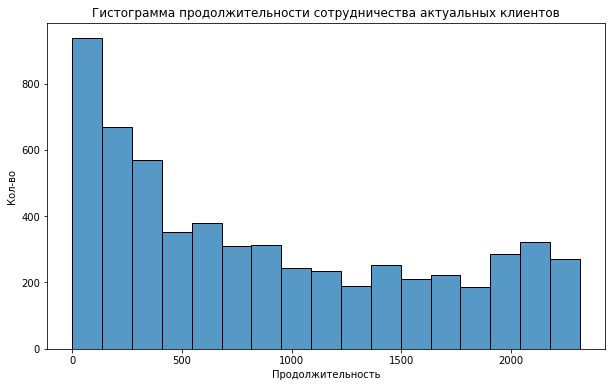

count    5942.000000
mean      893.681084
std       716.958551
min         0.000000
25%       245.000000
50%       702.000000
75%      1523.000000
max      2314.000000
Name: duration, dtype: float64


In [ ]:
hist_dur(df_false, 'Гистограмма продолжительности сотрудничества актуальных клиентов')

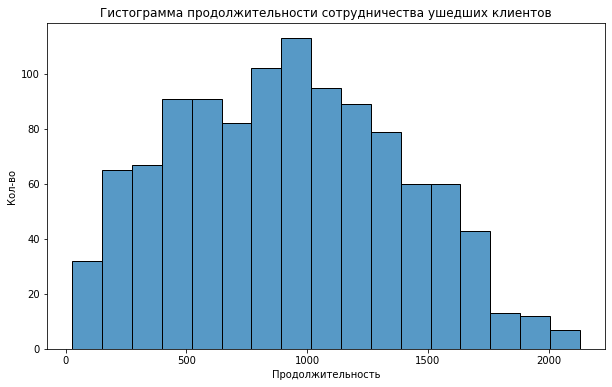

count    1101.000000
mean      924.863760
std       458.771309
min        28.000000
25%       577.000000
50%       915.000000
75%      1249.000000
max      2129.000000
Name: duration, dtype: float64


In [ ]:
hist_dur(df_true, 'Гистограмма продолжительности сотрудничества ушедших клиентов')

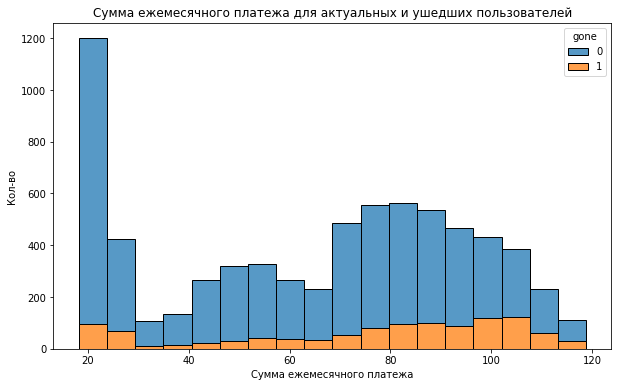

In [ ]:
hist_(full_df, 'monthly_charges', 'gone', 'Сумма ежемесячного платежа',
      'Сумма ежемесячного платежа для актуальных и ушедших пользователей')

В процессе анализа на мультиколлинеарность была выявлены сильная зависимость между продолжительностью и суммарными выплатами, а также зависимость между суммарными выплатами и месячным платежом. По данным причинам удаляем признак total_charges. Также удален признак с id пользователей.

Далее, было произведено разделение данных на обучающую и тестовую выборки. Размер тестовой выборки составил 0,25.  
RANDOM_STATE = 30723

Для обучения использовались следующие признаки:  
'type', 'paperless_billing', 'payment_method', 'monthly_charges',duration', 'gender', 'senior_citizen', 'partner', 'dependents', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines'.

При этом, для обучения логистической регрессии было применено кодирование категориальных признаков с помощью OHE, а полученные признаки подвергнуты масштабированию.

Модель случайного  леса  также использовала закодированные с помощью OHE  признаки, но без масштабирования.

Для обучения CatBoostClassifier использовались неизмененные признаки, но они были кодированы внутренними инструментами модели.

Из трех обученных видов моделей, а именно логичтической регрессии, случайного леса и градиентного бустинга из библиотеки CatBoost, лучший результат показала CatBoostClassifier, и именно эта модель использовалась на финальном тесте.

    Используемые параметры CatBoostClassifier: iterations=200,  
                                               depth=6,  
                                               learning_rate=0.1,
                                               loss_function='Logloss',
                                               eval_metric='AUC',
                                               random_seed=RANDOM_STATE
    Количество используемых частей при кросс-валидации = 5                                         
    Также использовалось кодирование инструментами модели: cat_features=features_categirical


На тестовой выборке получены следующие метрики:
        
    roc auc = 0.88
    Accuracy: 0.89
    Precision: 0.81
    Recall: 0.41
    F1-score: 0.54

Далее, был выведен график важности признаков.  
Можно наблюдать, что наибольшим значением обладает duration, type и monthly_charges.
Наименее значимыми являются streaming_tv, paperless_billing и gender.

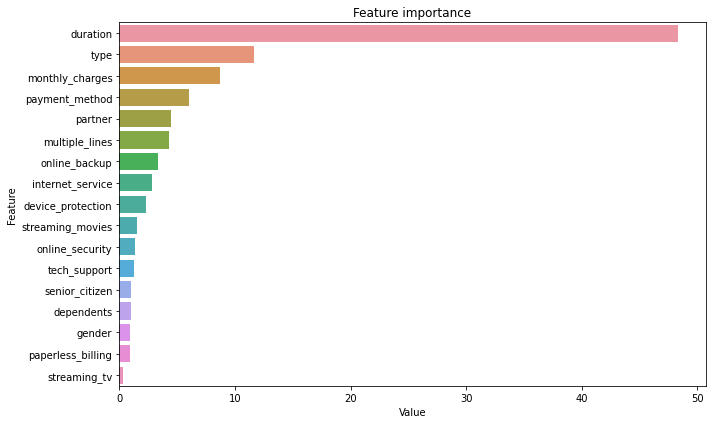

In [ ]:
feature_importance = model_cb.feature_importances_
feature_imp = pd.DataFrame(sorted(zip(feature_importance, features.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Feature importance')
plt.tight_layout()
plt.show();